## **"Как я использовал бутстрэп?"**






В данной работе приведены примеры применения метода Bootstrap для оценки показателей различных данных.


1. Установка необходимых пакетов

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install arch
from arch.bootstrap import IIDBootstrap, IndependentSamplesBootstrap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.5 MB/s eta 0:00:00


2. Создадим псевдослучайную выборку из биномиального распределения с

---

парметрами $n = 100$ и $p = 0.4$, состоящую из $100$ различных записей:

$P(N) = C^N_n * p^N * (1-p)^{n - N}$

In [ ]:
rng = np.random.default_rng(123)
data = np.random.binomial(100, 0.4, size=100)

Для Биномиального распределения с параметрами $n$ и $p$ верно:
> $E(X_i) = n*p$


3. Оценку математического ожидания получим с использованием естественной формулы: $\bar x = \frac{x_1 +\ldots + x_n}{n}$.

In [ ]:
samples_size = 1000
samples = [np.random.choice(data, len(data), replace=True) for i in range(samples_size)] # Сделаем много выборок с возможностью повтора из исходной
data_mean = np.mean([np.mean(samples[i]) for i in range(len(samples))]) # Найдем точечную оценку для каждой из них, а затем оценим полученные значения
print(data_mean)

40.0162


Видно, что полученное значение математического ожидания выборки соответсвует  действительному значению:

$E_{полученное}(X_i) ≈ 40.02$


$E_{действительное}(X_i) = 40$

4. Применим Bootstrap для составления прогноза на основе реальных данных. Возьмем [данные о зарплатах и названиях работ людей](https://colab.research.google.com/drive/1H0TBJniGHveyp6Z0rGTXdLmehNQhY11B#scrollTo=KJOh5FrUANtt&line=1&uniqifier=1).

In [107]:
import pandas as pd
data = pd.read_csv('sample_data/Salary.csv')
data['Age'] = data['Age'].astype('int')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000.0,USA,Asian,0


Попробуем отобразить зависимость зарплаты человека от его возраста:

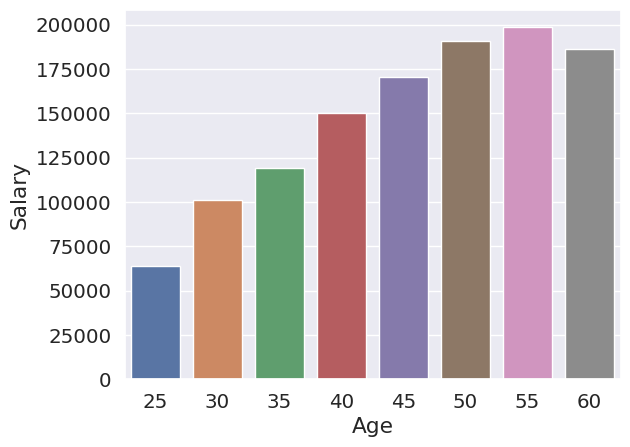

In [111]:
figure = sns.barplot(data=data[data['Age'] % 5 == 0], x="Age", y="Salary", errorbar=None)
figure.set(xlabel='Age', ylabel='Salary')

plt.show()

Построим доверительные интервалы для предсказания возраста человека по его зарплате.

Предскажем средний возраст человека, зараплата которого больше 150 тысяч.

In [ ]:
ages = data[data['Salary'] > 150000]['Age']
bootstrap_ages = IIDBootstrap(ages, seed=123)
age_conf = bootstrap_ages.conf_int(np.mean, method='percentile', reps=1000, size=0.95)
print(f"Average age is from {age_conf[0]} to {age_conf[1]}")

Average age is from [40.46707379] to [41.13947837]


Таким образом, средний возраст человека, зарплата которого больше $150$
тысяч лежит в пределах от $40.5$ до  $41.2$ полных лет.

5. Подведем итоги.

Bootstrap повзоляет легко провести оценку каких-либо параметров выборки, в том числе построить доверительные интервалы, без прямого применения каких-либо формул для подсчета метрик.